# Installation

**CPU-only version**

$ pip install tensorflow 



**GPU version**

$ pip install tensorflow-gpu






# Modules and Libraries

In [1]:
import tensorflow as tf

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.8.0'

# InitializeTraining data

In [3]:
n_samples = 100

In [4]:
x_train = np.linspace(-1, 1,n_samples, np.float32)
y_train = np.array(2*x_train + np.random.randn(*x_train.shape)*0.8, np.float32)

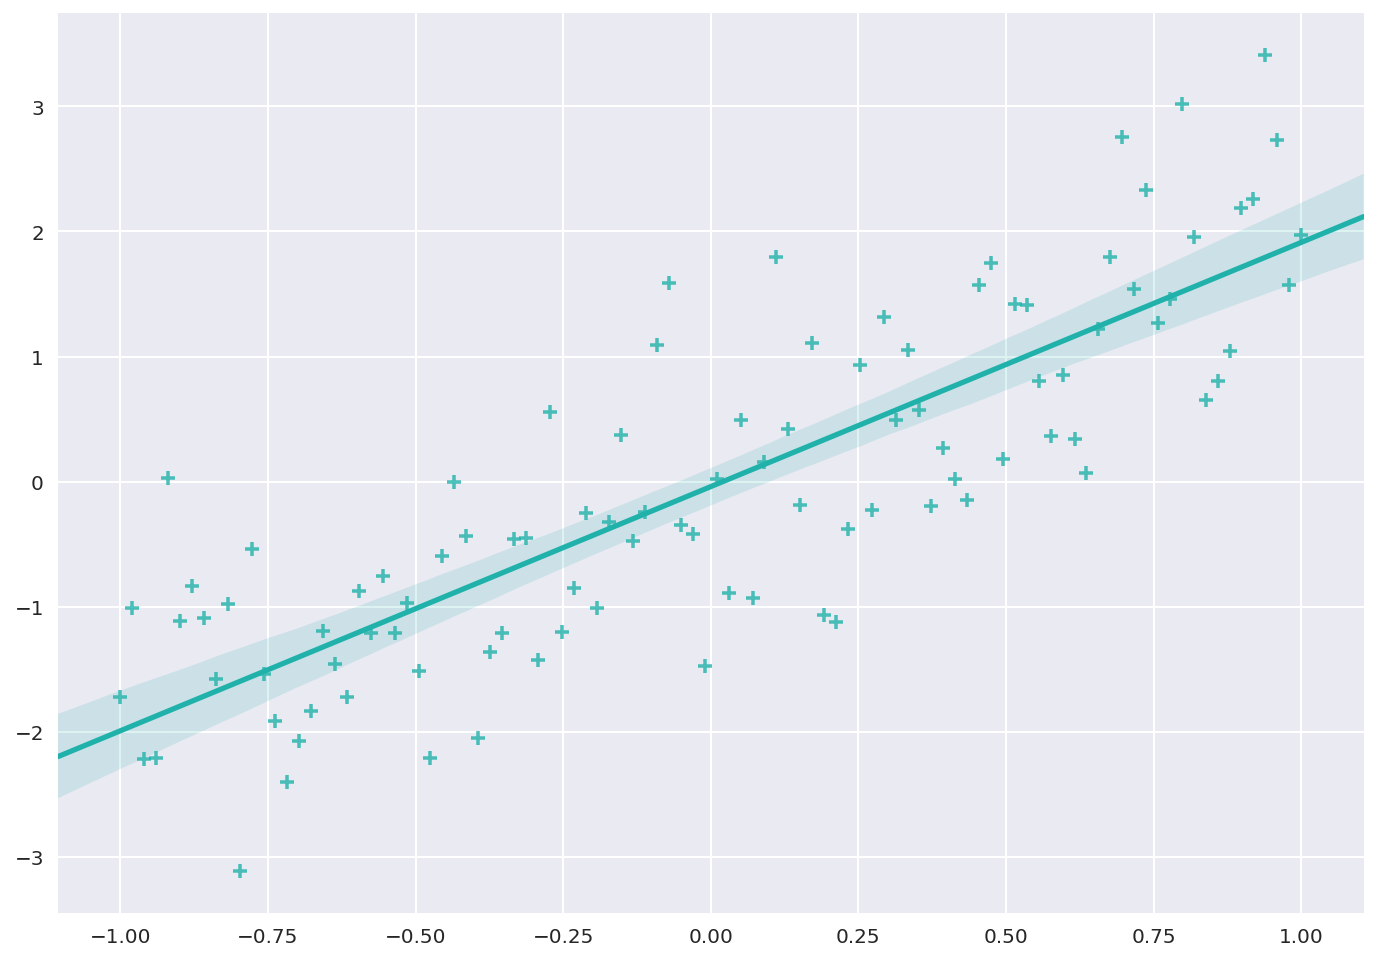

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax= sns.regplot(x=x_train,y=y_train, color = 'lightseagreen', marker = '+')

In [6]:
X_train = np.reshape(x_train, (n_samples,1))
Y_train = np.reshape(y_train, (n_samples,1))

# Model Parameters

In [7]:
learning_rate = 1e-2
training_epochs = 300
save_file = 'model/linear_regression.ckpt'

# Model Architecture

In [8]:
with  tf.variable_scope('input'):
    x = tf.placeholder(tf.float32,(None, 1))
    y = tf.placeholder(tf.float32,(None, 1))

In [9]:
with tf.variable_scope('linear_regression'):
    w = tf.get_variable('weights',(1,1), initializer=tf.random_normal_initializer())
    b = tf.Variable(tf.zeros((1)),tf.float32, name = 'bias')
    y_pred = tf.add(tf.matmul(x,w),b)

In [10]:
with tf.name_scope('train'):
    loss = tf.reduce_mean(tf.square(y-y_pred))
    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [11]:
init = tf.global_variables_initializer()

In [12]:
print(tf.get_default_graph().as_graph_def())

node {
  name: "input/Placeholder"
  op: "Placeholder"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
        dim {
          size: -1
        }
        dim {
          size: 1
        }
      }
    }
  }
}
node {
  name: "input/Placeholder_1"
  op: "Placeholder"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
        dim {
          size: -1
        }
        dim {
          size: 1
        }
      }
    }
  }
}
node {
  name: "linear_regression/weights/Initializer/random_normal/shape"
  op: "Const"
  attr {
    key: "_class"
    value {
      list {
        s: "loc:@linear_regression/weights"
      }
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
          dim {
            size: 2
          }
        }
      

# Model Training 

In [13]:
weights_hist = tf.summary.histogram('weights',w)
bias_hist = tf.summary.histogram('bias',b)
prediction_scalar = tf.summary.histogram('y_pred', y_pred)
loss_scalar = tf.summary.scalar('loss',loss)


merged = tf.summary.merge_all()
saver = tf.train.Saver()

In [14]:
with tf.Session() as sess: 
    sess.run(init)
    writer = tf.summary.FileWriter('projector', sess.graph)
    
    for step in range(training_epochs):        
        summary, cost, _, pred= sess.run([merged,loss,train_op,y_pred], feed_dict ={x:X_train, y: Y_train })
        writer.add_summary(summary, step)
        saver.save(sess,save_file, global_step=step)       
        if step % 10 == 0: 
            print('Epoch {:<3} - Training Loss: {}'.format(step,cost))
    writer.close()    
    
    weights = sess.run(w)
    bias = sess.run(b)
    print('weights: ',weights)
    print('bias: ',bias)

Epoch 0   - Training Loss: 2.0799331665039062
Epoch 10  - Training Loss: 1.8892769813537598
Epoch 20  - Training Loss: 1.7230539321899414
Epoch 30  - Training Loss: 1.5781103372573853
Epoch 40  - Training Loss: 1.4517076015472412
Epoch 50  - Training Loss: 1.3414642810821533
Epoch 60  - Training Loss: 1.2453076839447021
Epoch 70  - Training Loss: 1.1614338159561157
Epoch 80  - Training Loss: 1.088270664215088
Epoch 90  - Training Loss: 1.0244485139846802
Epoch 100 - Training Loss: 0.9687734246253967
Epoch 110 - Training Loss: 0.9202045202255249
Epoch 120 - Training Loss: 0.8778342604637146
Epoch 130 - Training Loss: 0.8408712148666382
Epoch 140 - Training Loss: 0.8086250424385071
Epoch 150 - Training Loss: 0.7804935574531555
Epoch 160 - Training Loss: 0.7559515237808228
Epoch 170 - Training Loss: 0.7345409989356995
Epoch 180 - Training Loss: 0.7158624529838562
Epoch 190 - Training Loss: 0.6995669603347778
Epoch 200 - Training Loss: 0.685350775718689
Epoch 210 - Training Loss: 0.6729483

# Regression Result

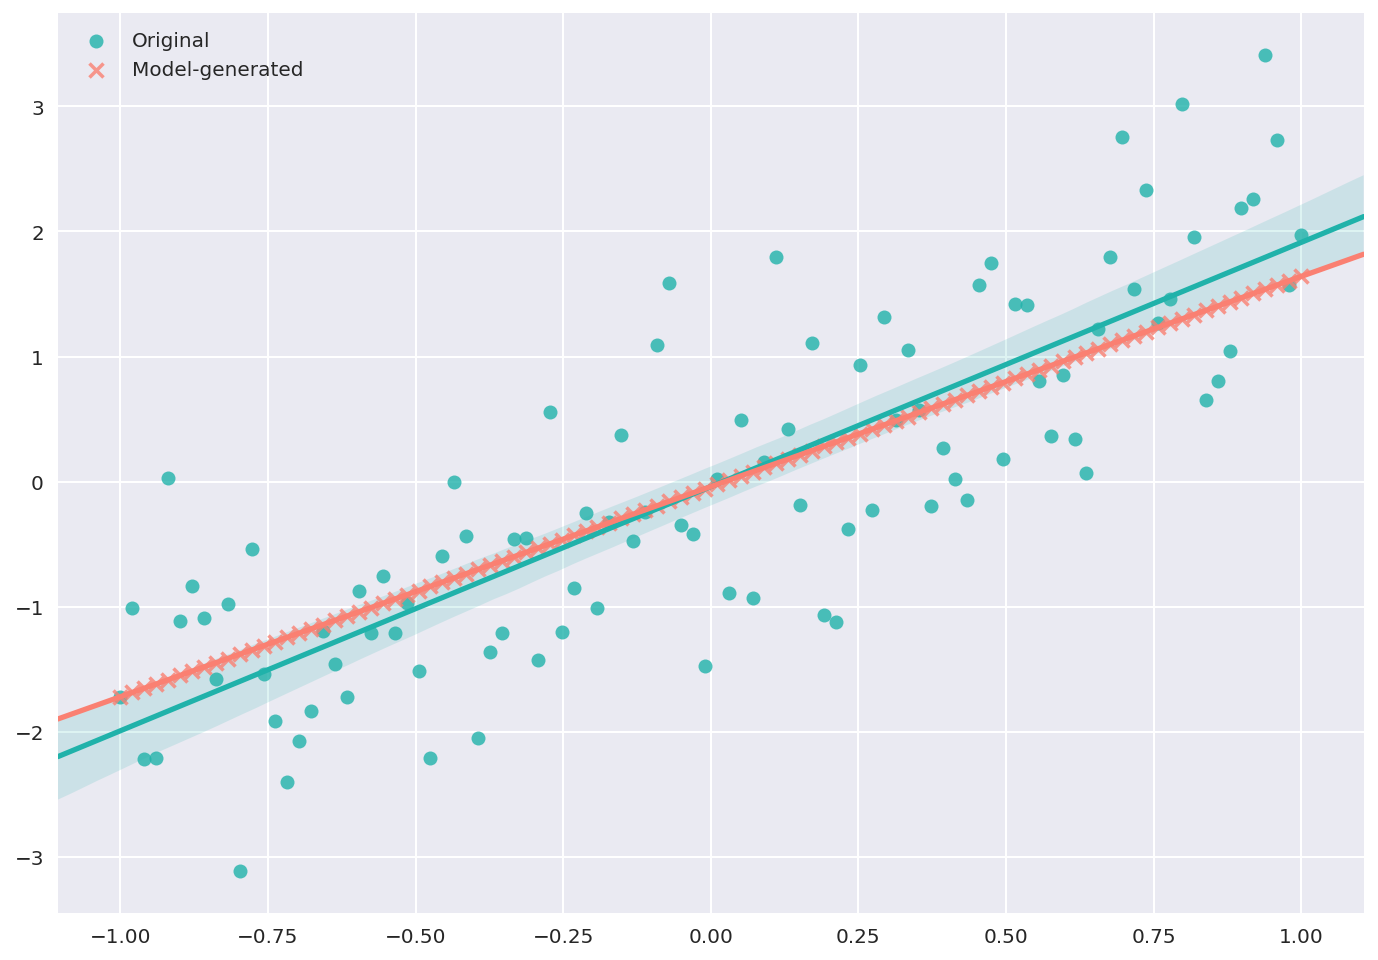

In [15]:
pred_y = np.squeeze(pred)
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.regplot(x=x_train, y=y_train, color = 'lightseagreen', marker = 'o',label = 'Original')
sns.regplot(x=x_train, y=pred_y, color = 'salmon', marker = 'x', ci = 68,label ='Model-generated')
plt.legend()